In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random

#Tokenization and Lowercasing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [67]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ABAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [68]:
df = pd.read_csv("./bbc_news.csv")

In [69]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [70]:
df.shape

(26304, 5)

In [71]:
# Drop one or more columns
df['Concatenated'] = df['title'] + df['description']
columns_to_drop = ['title','description','pubDate', 'guid', 'link']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
df


DataFrame after dropping columns:


,Concatenated
0,Ukraine: Angry Zelensky vows to punish Russian...
1,War in Ukraine: Taking cover in a town under a...
2,Ukraine war 'catastrophic for global food'One ...
3,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...
...,...
26299,Hamas hostages: Stories of the people taken fr...
26300,Images show major damage to Gaza's oldest mosq...
26301,Palestinians mourn writer killed in air strike...
26302,Gaza Strip in maps: How life has changed in tw...


In [74]:
df['tokenized_text'] = df['Concatenated'].apply(lambda x: word_tokenize(str(x).lower()))
#This line tokenizes the text in the 'text' column, converts each word to lowercase, and creates a new column 'tokenized_text' containing lists of tokens for each article.

In [75]:
stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
#Stopwords (common words like 'and', 'the', etc.) are removed from the tokenized text, and the result is stored in a new column 'filtered_text'.

In [76]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['filtered_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
#Lemmatization reduces words to their base or root form, helping to standardize variations. The lemmatized text is stored in a new column 'lemmatized_text'.

In [77]:
df['preprocessed_text'] = df['lemmatized_text'].apply(' '.join)
#The lemmatized text is converted back to a single string per article and stored in the 'preprocessed_text' column.

In [78]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_text'])
#TF-IDF vectorization converts the preprocessed text into numerical vectors, representing the importance of each word in the context of the entire corpus.

In [79]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
#Cosine similarity is calculated between each pair of articles based on their TF-IDF vectors. 

In [80]:
df

,Concatenated,tokenized_text,filtered_text,lemmatized_text,preprocessed_text
0,Ukraine: Angry Zelensky vows to punish Russian...,"[ukraine, :, angry, zelensky, vows, to, punish...","[ukraine, :, angry, zelensky, vows, punish, ru...","[ukraine, :, angry, zelensky, vow, punish, rus...",ukraine : angry zelensky vow punish russian at...
1,War in Ukraine: Taking cover in a town under a...,"[war, in, ukraine, :, taking, cover, in, a, to...","[war, ukraine, :, taking, cover, town, attackj...","[war, ukraine, :, taking, cover, town, attackj...",war ukraine : taking cover town attackjeremy b...
2,Ukraine war 'catastrophic for global food'One ...,"[ukraine, war, 'catastrophic, for, global, foo...","[ukraine, war, 'catastrophic, global, food'one...","[ukraine, war, 'catastrophic, global, food'one...",ukraine war 'catastrophic global food'one worl...
3,Manchester Arena bombing: Saffie Roussos's par...,"[manchester, arena, bombing, :, saffie, rousso...","[manchester, arena, bombing, :, saffie, rousso...","[manchester, arena, bombing, :, saffie, rousso...",manchester arena bombing : saffie roussos 's p...
4,Ukraine conflict: Oil price soars to highest l...,"[ukraine, conflict, :, oil, price, soars, to, ...","[ukraine, conflict, :, oil, price, soars, high...","[ukraine, conflict, :, oil, price, soar, highe...",ukraine conflict : oil price soar highest leve...
...,...,...,...,...,...
26299,Hamas hostages: Stories of the people taken fr...,"[hamas, hostages, :, stories, of, the, people,...","[hamas, hostages, :, stories, people, taken, i...","[hamas, hostage, :, story, people, taken, isra...",hamas hostage : story people taken israelit th...
26300,Images show major damage to Gaza's oldest mosq...,"[images, show, major, damage, to, gaza, 's, ol...","[images, show, major, damage, gaza, 's, oldest...","[image, show, major, damage, gaza, 's, oldest,...",image show major damage gaza 's oldest mosqueh...
26301,Palestinians mourn writer killed in air strike...,"[palestinians, mourn, writer, killed, in, air,...","[palestinians, mourn, writer, killed, air, str...","[palestinian, mourn, writer, killed, air, stri...",palestinian mourn writer killed air strikewrit...
26302,Gaza Strip in maps: How life has changed in tw...,"[gaza, strip, in, maps, :, how, life, has, cha...","[gaza, strip, maps, :, life, changed, two, mon...","[gaza, strip, map, :, life, changed, two, mont...",gaza strip map : life changed two monthsfind m...


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Concatenated       26304 non-null  object
 1   tokenized_text     26304 non-null  object
 2   filtered_text      26304 non-null  object
 3   lemmatized_text    26304 non-null  object
 4   preprocessed_text  26304 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [82]:
sample_size = 1000 
random_sample = df.sample(n=sample_size)
random_sample

,Concatenated,tokenized_text,filtered_text,lemmatized_text,preprocessed_text
21896,How Essex found itself at the heart of the sch...,"[how, essex, found, itself, at, the, heart, of...","[essex, found, heart, school, concrete, crisis...","[essex, found, heart, school, concrete, crisis...",essex found heart school concrete crisisfamili...
1894,Hepatitis cases detected in children in Europe...,"[hepatitis, cases, detected, in, children, in,...","[hepatitis, cases, detected, children, europe,...","[hepatitis, case, detected, child, europe, usa...",hepatitis case detected child europe usacute h...
2641,Ukraine war: Civilians now out of Azovstal pla...,"[ukraine, war, :, civilians, now, out, of, azo...","[ukraine, war, :, civilians, azovstal, plant, ...","[ukraine, war, :, civilian, azovstal, plant, m...",ukraine war : civilian azovstal plant mariupol...
19856,Newspaper headlines: Ulez policy warning and p...,"[newspaper, headlines, :, ulez, policy, warnin...","[newspaper, headlines, :, ulez, policy, warnin...","[newspaper, headline, :, ulez, policy, warning...",newspaper headline : ulez policy warning polic...
7036,BTec delays: 'If it was A-levels this would've...,"[btec, delays, :, 'if, it, was, a-levels, this...","[btec, delays, :, 'if, a-levels, would, 've, s...","[btec, delay, :, 'if, a-levels, would, 've, so...",btec delay : 'if a-levels would 've sorted qui...
...,...,...,...,...,...
20430,Winter Covid vaccines axed for under-65sOnly t...,"[winter, covid, vaccines, axed, for, under-65s...","[winter, covid, vaccines, axed, under-65sonly,...","[winter, covid, vaccine, axed, under-65sonly, ...",winter covid vaccine axed under-65sonly aged 6...
1493,Kinder chocolate factory told to shut over sal...,"[kinder, chocolate, factory, told, to, shut, o...","[kinder, chocolate, factory, told, shut, salmo...","[kinder, chocolate, factory, told, shut, salmo...",kinder chocolate factory told shut salmonella ...
14963,"Putin: China plan could end war, but Ukraine a...","[putin, :, china, plan, could, end, war, ,, bu...","[putin, :, china, plan, could, end, war, ,, uk...","[putin, :, china, plan, could, end, war, ,, uk...","putin : china plan could end war , ukraine wes..."
9287,Australia challenges China in mining for essen...,"[australia, challenges, china, in, mining, for...","[australia, challenges, china, mining, essenti...","[australia, challenge, china, mining, essentia...",australia challenge china mining essential ele...


In [83]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(random_sample['preprocessed_text'])
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

<Axes: >

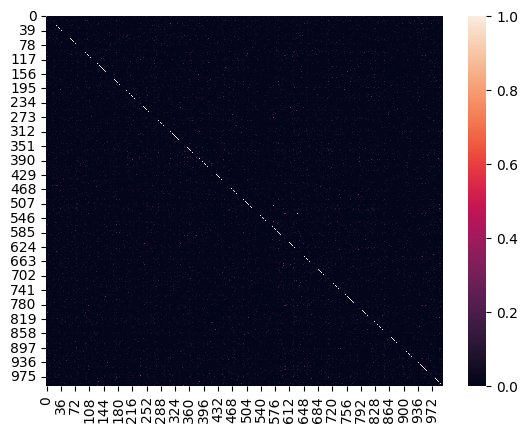

In [84]:
sns.heatmap(cosine_similarities)